# Customer Churn Prediction using Keras

## Problem Overview
Customer churn is the phenomenon where customers stop doing business with a company. It is an important metric for companies to understand and minimize. In this notebook, we will use deep learning to predict whether a customer will churn based on various customer attributes using Keras.

### Dataset
We will be using a customer churn dataset that contains information like:
- Customer tenure
- Monthly charges
- Total charges
- Contract type
- Payment method
- And more...

Each row in the dataset represents a customer, and the label indicates whether the customer has churned (1) or not (0).




In [3]:
import pandas as pd 
import numpy as np 


In [4]:
df=pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
x_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [17]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

d:\python\envs\ai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6845 - loss: 0.6002 - val_accuracy: 0.7975 - val_loss: 0.4844
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7984 - loss: 0.4604 - val_accuracy: 0.8025 - val_loss: 0.4508
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8033 - loss: 0.4409 - val_accuracy: 0.8069 - val_loss: 0.4366
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.4195 - val_accuracy: 0.8131 - val_loss: 0.4287
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4317 - val_accuracy: 0.8131 - val_loss: 0.4217
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8162 - loss: 0.4188 - val_accuracy: 0.8163 - val_loss: 0.4146
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.4040 - val_accuracy: 0.8163 - val_loss: 0.4083
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8186 - loss: 0.4066 - val_accu

In [23]:
model.layers[0].get_weights()

[array([[-5.11978745e-01,  5.48008800e-01,  2.95406908e-01,
         -3.12217504e-01, -9.58406106e-02, -8.56778100e-02,
          1.70830861e-01, -3.15099172e-02, -4.97024842e-02,
          6.37928784e-01, -1.67991608e-01],
        [ 6.08195841e-01, -6.01268113e-02, -6.58919811e-01,
          6.09579504e-01,  1.20146894e+00,  3.96840036e-01,
         -3.20307404e-01, -3.83240700e-01, -4.57358420e-01,
          5.75566590e-01,  1.34127450e+00],
        [ 2.56553859e-01, -7.23743320e-01, -8.79121125e-02,
         -2.26521209e-01,  2.91235745e-01, -4.43506166e-02,
          1.67063937e-01, -2.77602643e-01, -1.00847758e-01,
          2.52966344e-01, -5.04075214e-02],
        [-3.33111197e-01,  1.20227598e-03, -4.54732105e-02,
         -6.19356930e-01,  1.21281058e-01,  3.60368669e-01,
          6.86169207e-01,  9.21127915e-01,  9.62560326e-02,
         -3.33198220e-01, -3.12829092e-02],
        [ 5.50186396e-01,  6.18018210e-01, -1.87510058e-01,
         -2.17105642e-01,  8.77111435e-01,  

In [24]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
y_pred=np.where(y_log>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [27]:
import matplotlib.pyplot as plt

In [28]:
history.history

{'accuracy': [0.754687488079071,
  0.8028125166893005,
  0.8071874976158142,
  0.8109375238418579,
  0.8114062547683716,
  0.8142187595367432,
  0.8173437714576721,
  0.8214062452316284,
  0.8259375095367432,
  0.8339062333106995,
  0.8448437452316284,
  0.8532812595367432,
  0.8567187786102295,
  0.8592187762260437,
  0.8603125214576721,
  0.8603125214576721,
  0.8600000143051147,
  0.8596875071525574,
  0.8610937595367432,
  0.8610937595367432,
  0.8609374761581421,
  0.8621875047683716,
  0.8620312213897705,
  0.862500011920929,
  0.8604687452316284,
  0.8612499833106995,
  0.862500011920929,
  0.8637499809265137,
  0.8631250262260437,
  0.8623437285423279,
  0.862500011920929,
  0.8631250262260437,
  0.86328125,
  0.8614062666893005,
  0.8623437285423279,
  0.86328125,
  0.8634374737739563,
  0.8642187714576721,
  0.862500011920929,
  0.8639062643051147,
  0.8631250262260437,
  0.864062488079071,
  0.8651562333106995,
  0.8643749952316284,
  0.864062488079071,
  0.8651562333106995,

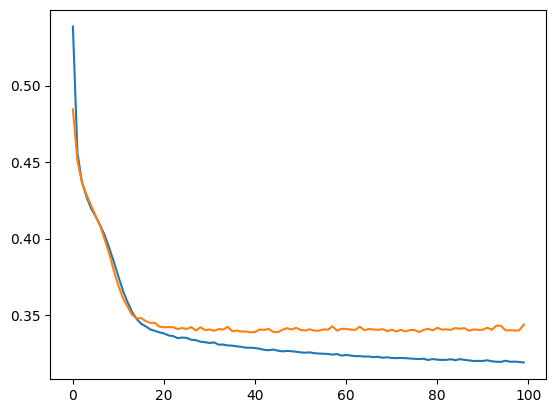

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

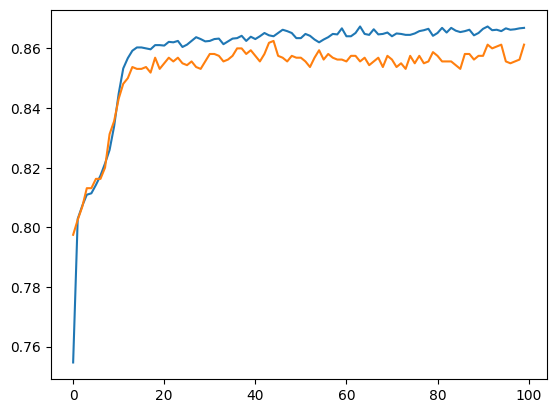

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
